# **Task 1: Relationship between the Survey network and the correlation network.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

In [ ]:
df = pd.read_excel("./EE325_Final Marks.xlsx")
df.tail(5)

#   Roll No   Student Name                 eMail  Quiz 1 (20)  \
58  59.0  B18EE062    SUNIKET DAS      das.5@iitj.ac.in    19.000000   
59  60.0  B18EE063  ARZOO QURESHI  qureshi.1@iitj.ac.in    19.000000   
60   NaN       NaN            NaN               Average    11.083333   
61   NaN       NaN            NaN                   Max    19.000000   
62   NaN       NaN            NaN                   Min     2.000000   

    Quiz 2 (20)  Quiz 3 (20)  Quiz 4 (20)  Quiz 5 (20)  Quiz (Best 4) (80)  \
58        9.000         13.0     8.000000    10.000000           51.000000   
59       12.000         17.0    13.500000    17.500000           67.000000   
60       10.075         14.5    10.079167    11.583333           49.829167   
61       17.500         20.0    16.500000    18.500000           69.000000   
62        1.000          6.0     1.500000     5.500000           27.000000   

    Lab Quiz 1 (10)  Lab Quiz 2 (10)  Lab Viva (10)  Mid Term (40)   \
58         5.000000         3.000000       7.500000       13.500000   
59         8.000000         3.500000       8.500000       15.000000   
60         5.566667         3.754167       6.716667       13.216667   
61         9.000000         8.000000       9.500000       23.500000   
62         2.000000         0.000000       0.000000        6.000000   

    End Sem Exam (50)  Assignment 1 (5)  Assignment 2 (5)  Assignment 3 (10)  \
58             31.500            3.7500            3.7500           7.000000   
59             39.500            4.2500            3.7500           7.500000   
60             32.025            3.7875            3.6375           6.129167   
61             42.000            5.0000            4.7500           9.750000   
62             19.000            2.0000            3.0000           3.000000   

    Assignment (20)  
58        14.500000  
59        15.500000  
60        13.554167  
61        17.750000  
62         9.750000

In [ ]:
# do NOT run this cell
sur_df = pd.read_csv('./Study_Groups.tsv', sep='\t')
sur_df.drop(columns=['Timestamp'], inplace=True)
sur_df.columns = ['email', 'friends']

name_dict = {}
email_dict = {}
for i in range(df.shape[0]):
    email_dict[df['eMail'][i]] = i
    name_dict[df['Student Name'][i]] = i

name_dict['I always study alone'] = -1

adj_list = {}
for i in range(sur_df.shape[0]):
    adj_list[email_dict[sur_df['email'][i]]] = sur_df['friends'][i].split(', ')

for k in adj_list.keys():
    for i in range(len(adj_list[k])):
        adj_list[k][i] = name_dict[adj_list[k][i]]

'''import pickle

with open('survey_adj_list.pickle', 'wb') as handle:
    pickle.dump(adj_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

handle.close()'''

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from random import random
from random import randint
from networkx.algorithms.community import naive_greedy_modularity_communities

def jaccard(x1, x2): # where x1 and x2 are two lists of nodes
    x1, x2 = set(x1), set(x2)
    jcc = len(x1.intersection(x2))/len(x1.union(x2))
    return jcc

def structural_analysis(m1_data,m2_data):
    print("Number of clusters in Month 1 =",len(m1_data))
    print("Number of clusters in Month 2 =",len(m2_data))

    for i in range(0,60):
        node = i
        cluster1=[]
        cluster2=[]
        for cluster in m1_data:
            if node in cluster:
                cluster1=cluster
                break
        for cluster in m2_data:
            if node in cluster:
                cluster2=cluster
                break
        print('Similarty measure for node {}:'.format(node))
        print(jaccard(cluster1,cluster2))
    return 


def corr_network(X, t = 0.8):
    corr = np.corrcoef(X)
    # corr = 0.5 + 0.5*corr
    adj = corr - np.eye(60)
    adj = (adj >= t)
    g = nx.from_numpy_matrix(adj)
    return g


def community_detection(G):
    node_groups = list(naive_greedy_modularity_communities(G))
    total_comm = len(node_groups)
    color_map = []
    colors = [(random(),random(),random()) for _i in range(total_comm)]
    for node in G:
        for i in range(total_comm):
            if node in node_groups[i]:
                color_map.append(colors[i]) 
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    nx.draw(G,pos,node_size = 5, width = 0.4,node_color=color_map, with_labels=True)
    plt.show()
    return node_groups

In [ ]:
import pickle

with open('survey_adj_list.pickle', 'rb') as handle:
    adj_list = pickle.load(handle)

handle.close()

keys = adj_list.keys()
for k in keys:
    if k in adj_list[k]:
        adj_list[k].remove(k)
    if -1 in adj_list[k]:
        adj_list[k].remove(-1)

invalid = []
for k in keys:
    if len(adj_list[k]) == 0:
        invalid.append(k)

adj_copy = adj_list.copy()
for k in keys:
    if k in invalid:
        del adj_copy[k]


import pickle

with open('survey_adj_list_clean1.pickle', 'wb') as handle:
    pickle.dump(adj_copy, handle, protocol=pickle.HIGHEST_PROTOCOL)

handle.close()

# Start from here

In [ ]:
import pickle

with open('survey_adj_list_clean1.pickle', 'rb') as handle:
    adj_list = pickle.load(handle)

handle.close()

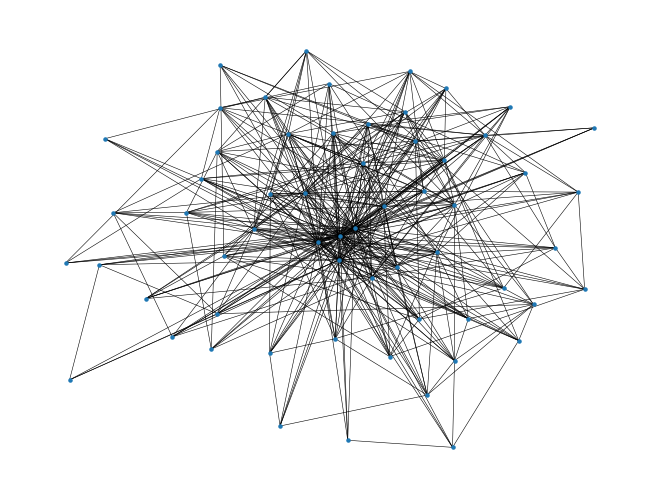

In [ ]:
sur_net = nx.from_dict_of_lists(adj_list)
nx.draw(sur_net, node_size = 5, width = 0.4)
plt.show()

In [ ]:
marks = [np.mean(df.iloc[:,[4,5,6,7,8]], axis = 1)[n] for n in sur_net.nodes()]

In [ ]:
from pyvis.network import Network
net = Network('500px', '800px',notebook=True)
net.repulsion(node_distance=400, spring_length=200)

net.add_nodes(list(sur_net.nodes()), value = marks)
for i,j in sur_net.edges():
    net.add_edge(i,j)
    
net.show('sur.html')


In [ ]:
def degree_dist(graph, log= False, w = None):
    degrees = [graph.degree(n, weight = w) for n in graph.nodes()]
    degrees = np.asarray(degrees)
    if log: dist =  np.log(degrees)
    else: dist =  degrees
    return dist

In [ ]:
x = nx.to_numpy_array(sur_net)
d = np.sum(x, axis=1).reshape(-1,1)
d*np.eye(60)

array([[18.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 16.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 19., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  4.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.]])

In [ ]:
def datacon(g1, g2, e = 1e-6):
    A1 = nx.to_numpy_array(g1)
    A2 = nx.to_numpy_array(g2)
    d1 = np.sum(A1, axis=1).reshape(-1,1)
    d2 = np.sum(A2, axis=1).reshape(-1,1)
    D1 = np.eye(A1.shape[0])*d1
    D2 = np.eye(A2.shape[0])*d2
    S1 = np.linalg.inv(np.eye(A1.shape[0]) + D1*(e**2) + A1*(-e))
    S2 = np.linalg.inv(np.eye(A2.shape[0]) + D2*(e**2) + A2*(-e))
    d = np.sqrt(np.sum(np.square(np.sqrt(S1) - np.sqrt(S2))))
    return d
    

In [ ]:
barabasi = nx.barabasi_albert_graph(n = 60, m= 2)

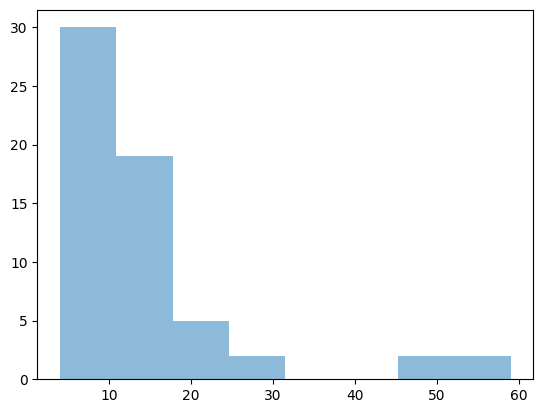

In [ ]:
dist_sur = degree_dist(sur_net, log=False)
plt.hist(dist_sur, bins=8, alpha = 0.5)
plt.show()

In [ ]:
degrees = degree_dist(sur_net)

In [ ]:
marks = np.asarray([df.iloc[:,17][n] for n in sur_net.nodes()])
np.corrcoef(x = marks, y = degrees)

array([[1.        , 0.23638547],
       [0.23638547, 1.        ]])

In [ ]:

def Monte_Carlo_ICM(g, p, seed, runs):
    estimate = []
    node_list = list(g.nodes())
    adj_list = nx.to_dict_of_lists(g)
    
    for t in range(runs):
        info_list = dict(zip(node_list, np.zeros((len(node_list),)) == 1))
        nx.set_node_attributes(g, info_list, "info")
        for s in seed:
            g.nodes[s]["info"] = True
        seed_proxy = seed.copy()

        for n in seed_proxy:
            for nei in adj_list[n]:
                if not(g.nodes[nei]["info"]):
                    toss = random.random()
                    if p > toss:
                        g.nodes[nei]["info"] = True
                        seed_proxy.append(nei)
        estimate.append(len(seed_proxy))
    return np.array(estimate, dtype=np.int32)

In [ ]:
icm_sur = Monte_Carlo_ICM(sur_net, 0.1, [51], 10000)
round(icm_sur.mean())

20

# Correlation Network

In [ ]:
X = df.iloc[:60,4:9].to_numpy()
corr = np.corrcoef(X)
corr = 0.5 + 0.5*corr
adj = corr - np.eye(60)
#adj = adj >= 0.8
#marks_net = nx.from_numpy_matrix(adj)

In [ ]:
datacon(sur_net, marks_net, e = 1e-12)

2.922327839273127e-05

In [ ]:
distances = []
for t in np.linspace(0.75,0.85, 22):
    adj_ = adj >= t
    marks_net = nx.from_numpy_matrix(adj_)
    d = datacon(marks_net, sur_net, 0.01)
    distances.append(d)
    print(t,'\t', d)

0.75 	 3.200584082630727
0.7547619047619047 	 3.2047656855605946
0.7595238095238095 	 3.1946387071373015
0.7642857142857142 	 3.168713355875948
0.7690476190476191 	 3.1581434298685687
0.7738095238095238 	 3.145503219312031
0.7785714285714286 	 3.137962800519673
0.7833333333333333 	 3.1327869574178697
0.7880952380952381 	 3.1349939541514478
0.7928571428571428 	 3.1268085733526596
0.7976190476190476 	 3.125936113608742
0.8023809523809524 	 3.1270264874133686
0.8071428571428572 	 3.121685857587881
0.8119047619047619 	 3.1229892537791417
0.8166666666666667 	 3.1267223221476605
0.8214285714285714 	 3.140579746617672
0.8261904761904761 	 3.136809247961632
0.8309523809523809 	 3.1388664036324894
0.8357142857142856 	 3.138502412244634
0.8404761904761905 	 3.1377749501932093
0.8452380952380952 	 3.1371071534734787
0.85 	 3.1467031999174755


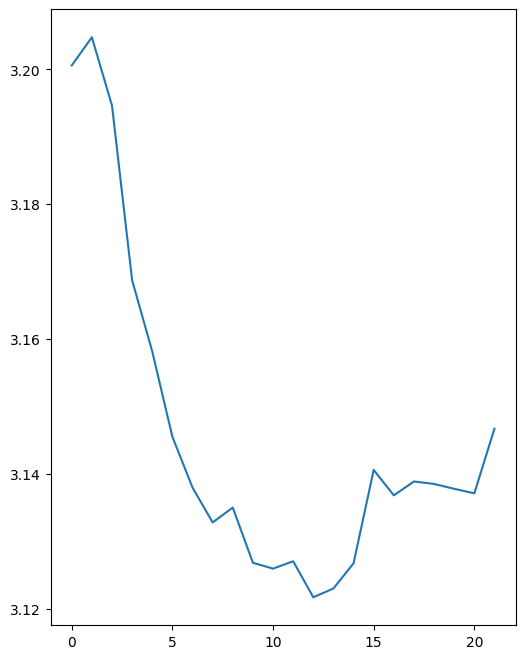

In [ ]:
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(8)
plt.plot(distances)
plt.show()

In [ ]:
icm_marks = Monte_Carlo_ICM(marks_net, 0.1, [51], 10000)
round(icm_marks.mean())

26

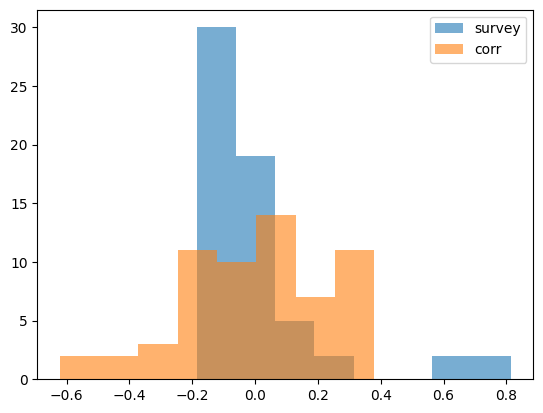

In [ ]:
from sklearn.preprocessing import MinMaxScaler
marks_dist = degree_dist(marks_net, w='weight')
dist_sur = degree_dist(sur_net)
scale = MinMaxScaler()
marks_dist = scale.fit_transform(marks_dist.reshape(-1,1))
marks_dist -= np.mean(marks_dist)
scale = MinMaxScaler()
dist_sur = scale.fit_transform(dist_sur.reshape(-1,1))
dist_sur -= np.mean(dist_sur)
plt.hist(dist_sur, bins=8, alpha = 0.6)
plt.hist(marks_dist, bins=8, alpha = 0.6)
plt.legend(["survey", "corr"])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
marks_dist = degree_dist(marks_net)
dist_sur = degree_dist(sur_net)
#scale = MinMaxScaler()
#marks_dist = scale.fit_transform(marks_dist.reshape(-1,1))
#marks_dist -= np.mean(marks_dist)
#scale = MinMaxScaler()
#dist_sur = scale.fit_transform(dist_sur.reshape(-1,1))
#dist_sur -= np.mean(dist_sur)
plt.hist(dist_sur, bins=8, alpha = 0.6)
plt.hist(marks_dist, bins=8, alpha = 0.6)
plt.legend(["survey", "corr"])
plt.show()

In [ ]:
marks_dist = degree_dist(marks_net)
dist_sur = degree_dist(sur_net)

In [ ]:
sur_eig = nx.eigenvector_centrality(sur_net)
marks_eig = nx.eigenvector_centrality(marks_net, weight = 'weight')
eig_vec = np.asarray(list(sur_eig.values()))
marks_vec = np.asarray(list(marks_eig.values()))

In [ ]:
np.corrcoef(x = dist_sur, y = marks_vec)

array([[1.        , 0.24467232],
       [0.24467232, 1.        ]])

In [ ]:
np.corrcoef(x = marks_dist, y = dist_sur)

array([[1.        , 0.23518802],
       [0.23518802, 1.        ]])

In [ ]:
adj = corr - np.eye(60)
adj = adj >= 0.8

In [ ]:
def jaccard(x1, x2): # where x1 and x2 are two lists of nodes
    x1, x2 = set(x1), set(x2)
    jcc = len(x1.intersection(x2))/len(x1.union(x2))
    return jcc

In [ ]:
for t in np.linspace(0.1, 0.9, num=1000):
    adj = corr - np.eye(60)
    adj = adj >= t
    print(jaccard(adj, sur_adj))

0.12205965576411407
1.6324420250566258
1.2102779068543341
0.9871936759074389
0.7607425152206222
0.5313370920769556
0.42444427132894624


In [ ]:
G = nx.from_numpy_matrix(adj)

In [ ]:
names = list(df["Student Name"])
name_dict = dict()
for i in range(60):
    name_dict[i] = names[i]

In [ ]:
pos = nx.spring_layout(sur_net, k=0.1, iterations=10)
nx.draw(sur_net, pos, node_size = 5, width = 0.4)
plt.show()

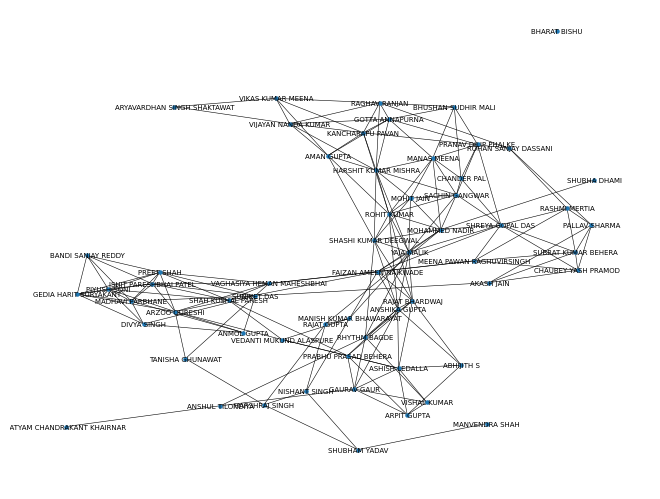

In [ ]:
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G,pos, node_size = 5, width = 0.4,labels=name_dict, with_labels = True, font_size = 5)
plt.show()

In [ ]:
import random
def ICM(G,initial_active_nodes,prob,iters):
    total_active_nodes = 0          # store total number of active nodes in each iterations
    for t in range(iters):
        active_nodes = initial_active_nodes.copy()   
        nodes_visited = []          # once a active node is considered, it should not consider it again
        
        # loop will continue if size of active_nodes is changing 
        while 1:
            new_active_nodes=[]
            # finding inactive node v, neighbour of active node u, such that rand probability <= diffusion probablity and is not visited 
            for u in active_nodes:
                if u not in nodes_visited:      # once a active node is considered, it should not consider it again
                    nodes_visited.append(u)
                    for v in nx.neighbors(G,u):
                        if v not in nodes_visited :     # active node should not be considered 
                            rand_p= random.random()
                            if rand_p <= prob:
                                new_active_nodes.append(v)

            if len(new_active_nodes)==0:            # if no change in new active nodes, break
                break
            active_nodes = new_active_nodes.copy()
        total_active_nodes+=len(nodes_visited)       # total active nodes after each iter
    return total_active_nodes/iters


def main1():
    nodes = 1000
    G = nx.barabasi_albert_graph(nodes,2)
    active_nodes = []
    while len(active_nodes)<50:
        x = random.randint(0,nodes-1)
        if x not in active_nodes:
            active_nodes.append(x)
    prob = random.uniform(0.05,0.15)
    iters = 10000
    print("Avg number of Active Nodes for ICM (prob = {}) after {} iters = {}".format(prob,iters,ICM(G,active_nodes,prob,iters)))
    prob = random.uniform(0.05,0.15)
    iters = 10000
    print("Avg number of Active Nodes for ICM (prob = {}) after {} iters = {}".format(prob,iters,ICM(G,active_nodes,prob,iters)))
    prob = random.uniform(0.05,0.15)
    iters = 10000
    print("Avg number of Active Nodes for ICM (prob = {}) after {} iters = {}".format(prob,iters,ICM(G,active_nodes,prob,iters)))
    return 

# Task 3 and 4

In [ ]:
df = pd.read_excel("./EE325_Final Marks.xlsx")
df.head()

#   Roll No  form  ... Assignment 2 (5) Assignment 3 (10)  Assignment (20)
0  1.0  B18EE001   0.0  ...             3.00              4.50            11.75
1  2.0  B18EE002   0.0  ...             3.25              7.75            15.25
2  3.0  B18EE003   0.0  ...             3.00              6.00            13.00
3  4.0  B18EE004   0.0  ...             3.00              4.50            10.50
4  5.0  B18EE005   0.0  ...             3.00              8.50            15.50

[5 rows x 20 columns]

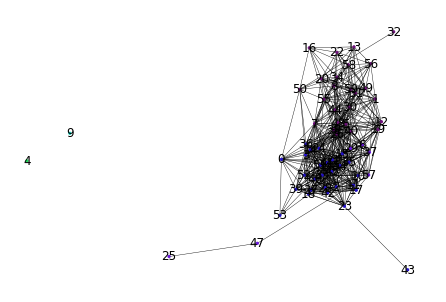

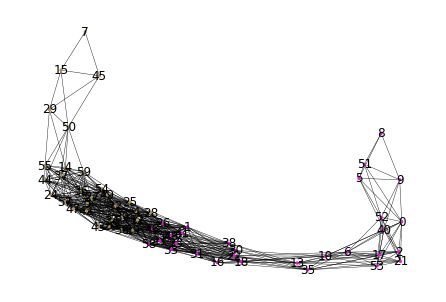

Number of clusters in Month 1 = 5
Number of clusters in Month 2 = 2
Similarty measure for node 0:
0.35714285714285715
Similarty measure for node 1:
0.30952380952380953
Similarty measure for node 2:
0.35714285714285715
Similarty measure for node 3:
0.26666666666666666
Similarty measure for node 4:
0.03333333333333333
Similarty measure for node 5:
0.30952380952380953
Similarty measure for node 6:
0.02857142857142857
Similarty measure for node 7:
0.27906976744186046
Similarty measure for node 8:
0.30952380952380953
Similarty measure for node 9:
0.03333333333333333
Similarty measure for node 10:
0.35714285714285715
Similarty measure for node 11:
0.35714285714285715
Similarty measure for node 12:
0.27906976744186046
Similarty measure for node 13:
0.30952380952380953
Similarty measure for node 14:
0.26666666666666666
Similarty measure for node 15:
0.26666666666666666
Similarty measure for node 16:
0.30952380952380953
Similarty measure for node 17:
0.35714285714285715
Similarty measure for no

In [ ]:
def data():
    df = pd.read_excel("./EE325_Final Marks.xlsx")
    df = df.replace('A',0)
    X = df.iloc[:60,5:16].to_numpy()
    X[:,9]/=2
    X[:,10]/=2.5
    X_new = np.delete(X,[5,6,7,8],1)
    return X_new

def main1():
    X = data()
    month1 = X[:,[0,1,2,5]]
    month2 = X[:,[3,4,6]]

    g1=corr_network(month1,0.8)
    g2=corr_network(month2,0.8)
    node_group1=community_detection(g1)
    node_group2=community_detection(g2)
    structural_analysis(node_group1,node_group2)
    return

main1()

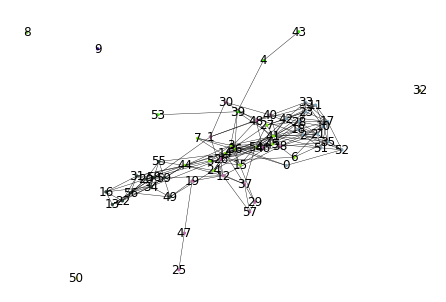

Overall Number of clusters =  9
['BANDI SANJAY REDDY', 'BHARAT BISHU', 'MANVENDRA SHAH', 'PRABHU PRASAD BEHERA', 'SATYAM CHANDRAKANT KHAIRNAR', 'VEDANTI MUKUND ALASPURE', 'VISHAL KUMAR']


In [ ]:
def main2():
    X=data()
    g=corr_network(X,0.8)
    node_group=community_detection(g)
    print("Overall Number of clusters = ",len(node_group))

    degrees=[val for (node,val) in g.degree()]
    df=pd.read_excel("./EE325_Final Marks.xlsx")
    unique_nodes = []
    for i in range(60):
        if degrees[i]<2:
            unique_nodes.append(df.iloc[i,3])
    print(unique_nodes)

main2()